In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('dataset/Ata_Demirer/27.jpg')
img.shape

(422, 750, 3)

In [3]:
print(type(img))

<class 'numpy.ndarray'>


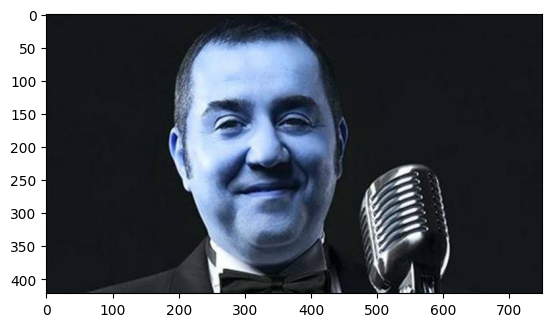

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(422, 750)

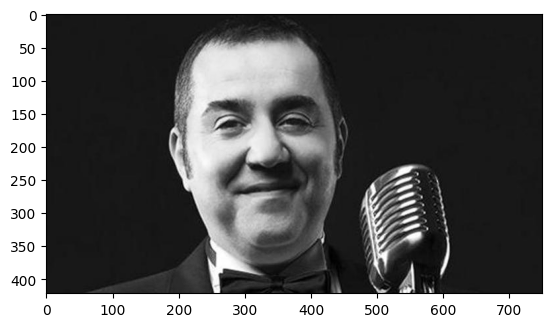

In [6]:
plt.imshow(gray, cmap="gray")

In [7]:
# For Face:
face_cascade = cv2.CascadeClassifier("opencv/haarcascades/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces #values are x,y,width,height

array([[178,  43, 298, 298]])

In [8]:
(x,y,w,h) = faces[0]
x,y,h,w

(178, 43, 298, 298)

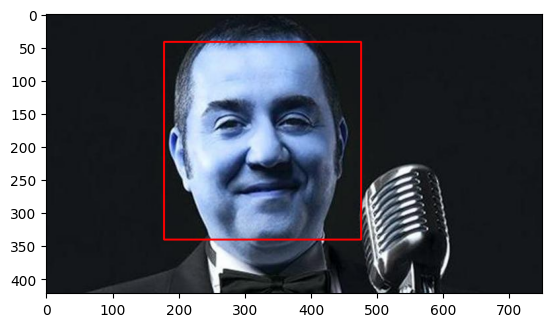

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #(255,0,0) equals to rectangle color in rgb which is red.
plt.imshow(face_img)

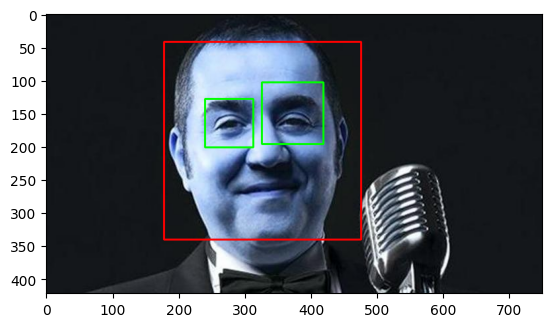

In [10]:
# For eyes
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

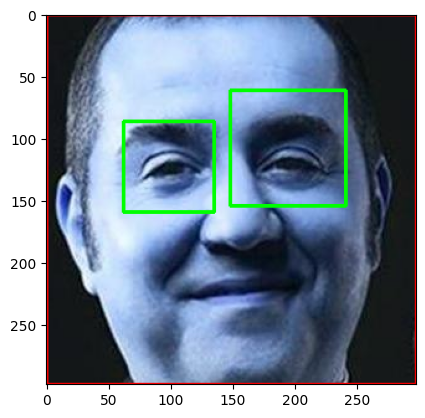

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap="gray")

In [12]:
# Let's write an algorithm to crop faces from all the images into the cropped file
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/.cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs  # my folders includes images

['./dataset/.cropped',
 './dataset/Ata_Demirer',
 './dataset/Beyazit_ozturk',
 './dataset/Cem_Yilmaz',
 './dataset/Okan_Bayulgen',
 './dataset/Tolga_Cevik']

In [16]:
import shutil  #adds the cropped folder
if os.path.exists(path_to_cr_data):   #if its exist delete it and create new one.
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

./dataset/Ata_Demirer\1.jpg
Generating cropped images in folder:  ./dataset/.cropped/Ata_Demirer
./dataset/Ata_Demirer\10.jpg
./dataset/Ata_Demirer\100.jpg
./dataset/Ata_Demirer\101.jpg
./dataset/Ata_Demirer\102.jpg
./dataset/Ata_Demirer\103.jpg
./dataset/Ata_Demirer\104.jpg
./dataset/Ata_Demirer\105.jpg
./dataset/Ata_Demirer\106.jpg
./dataset/Ata_Demirer\107.jpg
./dataset/Ata_Demirer\108.jpg
./dataset/Ata_Demirer\109.png
./dataset/Ata_Demirer\11.jpg
./dataset/Ata_Demirer\110.jpg
./dataset/Ata_Demirer\111.jpg
./dataset/Ata_Demirer\112.jpg
./dataset/Ata_Demirer\113.jpg
./dataset/Ata_Demirer\114.jpg
./dataset/Ata_Demirer\115.jpg
./dataset/Ata_Demirer\116.jpg
./dataset/Ata_Demirer\117.png
./dataset/Ata_Demirer\118.jpg
./dataset/Ata_Demirer\119.jpg
./dataset/Ata_Demirer\12.jpg
./dataset/Ata_Demirer\120.jpg
./dataset/Ata_Demirer\121.jpg
./dataset/Ata_Demirer\122.png
./dataset/Ata_Demirer\123.jpg
./dataset/Ata_Demirer\124.jpg
./dataset/Ata_Demirer\125.jpg
./dataset/Ata_Demirer\126.jpg
./data

./dataset/Beyazit_ozturk\89.jpg
./dataset/Beyazit_ozturk\9.jpg
./dataset/Beyazit_ozturk\90.jpg
./dataset/Beyazit_ozturk\91.jpg
./dataset/Beyazit_ozturk\92.png
./dataset/Beyazit_ozturk\93.jpg
./dataset/Cem_Yilmaz\1.jpg
Generating cropped images in folder:  ./dataset/.cropped/Cem_Yilmaz
./dataset/Cem_Yilmaz\10.jpg
./dataset/Cem_Yilmaz\100.jpg
./dataset/Cem_Yilmaz\101.jpg
./dataset/Cem_Yilmaz\102.jpg
./dataset/Cem_Yilmaz\103.jpg
./dataset/Cem_Yilmaz\104.jpg
./dataset/Cem_Yilmaz\105.jpg
./dataset/Cem_Yilmaz\106.jpg
./dataset/Cem_Yilmaz\107.jpg
./dataset/Cem_Yilmaz\108.jpg
./dataset/Cem_Yilmaz\109.jpg
./dataset/Cem_Yilmaz\11.jpg
./dataset/Cem_Yilmaz\110.jpg
./dataset/Cem_Yilmaz\111.jpg
./dataset/Cem_Yilmaz\112.png
./dataset/Cem_Yilmaz\113.jpg
./dataset/Cem_Yilmaz\114.jpg
./dataset/Cem_Yilmaz\115.jpg
./dataset/Cem_Yilmaz\116.jpg
./dataset/Cem_Yilmaz\117.jpg
./dataset/Cem_Yilmaz\118.jpg
./dataset/Cem_Yilmaz\119.jpg
./dataset/Cem_Yilmaz\12.jpg
./dataset/Cem_Yilmaz\120.png
./dataset/Cem_Yilmaz\

./dataset/Okan_Bayulgen\172.jpg
./dataset/Okan_Bayulgen\173.jpg
./dataset/Okan_Bayulgen\174.jpg
./dataset/Okan_Bayulgen\175.jpg
./dataset/Okan_Bayulgen\18.jpg
./dataset/Okan_Bayulgen\19.jpg
./dataset/Okan_Bayulgen\2.jpg
./dataset/Okan_Bayulgen\20.png
./dataset/Okan_Bayulgen\21.png
./dataset/Okan_Bayulgen\22.jpg
./dataset/Okan_Bayulgen\23.jpg
./dataset/Okan_Bayulgen\24.jpg
./dataset/Okan_Bayulgen\25.jpg
./dataset/Okan_Bayulgen\26.jpg
./dataset/Okan_Bayulgen\27.jpg
./dataset/Okan_Bayulgen\28.jpg
./dataset/Okan_Bayulgen\29.jpg
./dataset/Okan_Bayulgen\3.jpg
./dataset/Okan_Bayulgen\30.jpg
./dataset/Okan_Bayulgen\31.jpg
./dataset/Okan_Bayulgen\32.jpg
./dataset/Okan_Bayulgen\33.jpg
./dataset/Okan_Bayulgen\34.jpg
./dataset/Okan_Bayulgen\35.jpg
./dataset/Okan_Bayulgen\36.jpg
./dataset/Okan_Bayulgen\37.jpg
./dataset/Okan_Bayulgen\38.jpg
./dataset/Okan_Bayulgen\39.jpg
./dataset/Okan_Bayulgen\4.jpg
./dataset/Okan_Bayulgen\40.jpg
./dataset/Okan_Bayulgen\41.jpg
./dataset/Okan_Bayulgen\42.jpg
./datas

In [18]:
#Üstte olan fotoğraları elle dosyadan ayıklandı.

In [19]:
#Transforming images in cropped folder into wavelenght transformed images.

In [20]:
import numpy as np
import cv2    
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wa<vedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

C:\Users\yigit\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


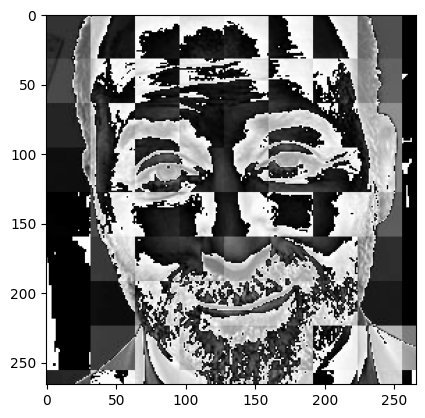

In [21]:
cropped_img = np.array(roi_color)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
celebrity_file_names_dict

{'.cropped': [],
 'Ata_Demirer': ['./dataset/.cropped/Ata_Demirer/Ata_Demirer1.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer2.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer3.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer4.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer5.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer6.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer7.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer8.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer9.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer10.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer11.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer12.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer13.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer14.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer15.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer16.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer17.png',
  './dataset/.cropped/Ata_Demirer/Ata_Demirer18.png',
  './

In [23]:
class_dict = {'Ata_Demirer': 0,
 'Beyazit_ozturk': 1,
 'Cem_Yilmaz': 2,
 'Okan_Bayulgen': 3,
 'Tolga_Cevik': 4}

In [24]:
X, y = [], []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [25]:
len(X) #316 toplam set fotoğraf

316

In [26]:
32*32*3 + 32*32

4096

In [27]:
print(len(X[0]))

4096


In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(316, 4096)

In [29]:
#model training

In [30]:
from sklearn.svm import SVC   
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [31]:
#train-test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) #radial basis function for non-linear classifier
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8607594936708861

In [33]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.80      0.89        10
           2       1.00      0.62      0.77        16
           3       0.74      1.00      0.85        17
           4       0.83      0.95      0.89        21

    accuracy                           0.86        79
   macro avg       0.90      0.85      0.86        79
weighted avg       0.89      0.86      0.86        79



In [34]:
# lets use grid serach to try out multiple models with different parameters.

In [35]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [36]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [37]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.721986,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.540071,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.747429,{'logisticregression__C': 1}


In [38]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [39]:
best_estimators['svm'].score(X_test,y_test)

0.8481012658227848

In [40]:
best_estimators['random_forest'].score(X_test,y_test)

0.6582278481012658

In [41]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8354430379746836

In [42]:
#best one so far was support vector machine

In [43]:
best_clf = best_estimators["svm"]

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[12,  0,  0,  2,  1],
       [ 0,  9,  0,  1,  0],
       [ 0,  0, 11,  2,  3],
       [ 0,  0,  0, 17,  0],
       [ 1,  0,  2,  0, 18]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

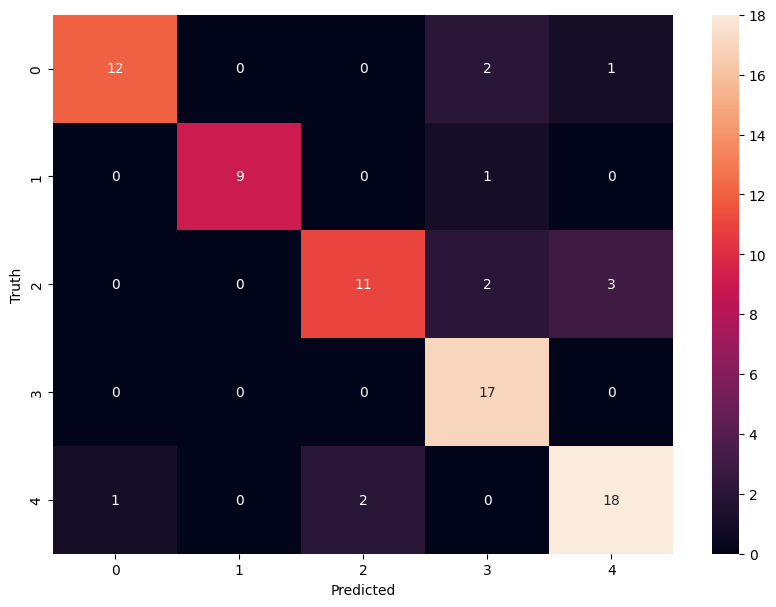

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
class_dict


{'Ata_Demirer': 0,
 'Beyazit_ozturk': 1,
 'Cem_Yilmaz': 2,
 'Okan_Bayulgen': 3,
 'Tolga_Cevik': 4}

In [48]:
# as we can see model is mixing up mostly with cem yılmaz with tolga çevik.

In [49]:
# saving the trained model

In [50]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [51]:
# saving class dictionary as json file

In [52]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))